In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

n_points = 1000000  # 1 million points

x_points = tf.random.uniform([n_points], minval=-1, maxval=1)
y_points = tf.random.uniform([n_points], minval=-1, maxval=1)

distances = tf.square(x_points) + tf.square(y_points)

inside_circle = tf.less_equal(distances, 1.0)

inside_circle_count = tf.reduce_sum(tf.cast(inside_circle, tf.int32))
pi_estimate = 4 * inside_circle_count / n_points




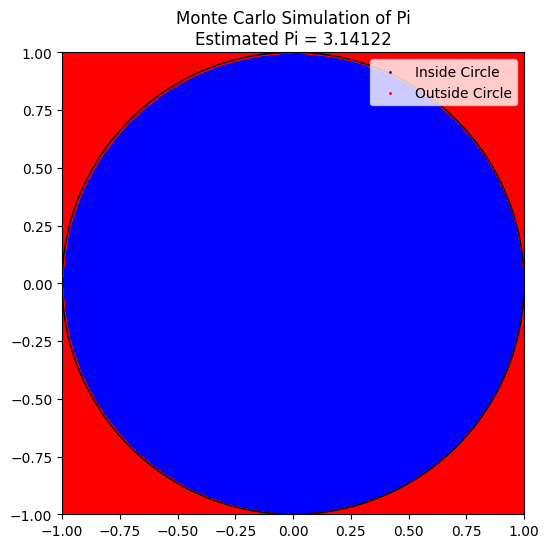

In [9]:
x_points_np = x_points.numpy()
y_points_np = y_points.numpy()
inside_circle_np = inside_circle.numpy()

plt.figure(figsize=(6,6))
plt.scatter(x_points_np[inside_circle_np], y_points_np[inside_circle_np], color='blue', s=1, label='Inside Circle')
plt.scatter(x_points_np[~inside_circle_np], y_points_np[~inside_circle_np], color='red', s=1, label='Outside Circle')

circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_artist(circle)

plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"Monte Carlo Simulation of Pi\nEstimated Pi = {pi_estimate.numpy()}")
plt.legend(loc='upper right')
plt.show()

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8603 - loss: 0.3572
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9711 - loss: 0.0834
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9824 - loss: 0.0594
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9857 - loss: 0.0475
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9861 - loss: 0.0423
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9878 - loss: 0.0380
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9887 - loss: 0.0351
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9889 - loss: 0.0328
Epoch 9/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9890 - loss: 0.0305
Epoch 10/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9896 - loss: 0.0296
31250/31250 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step
Estimated value of Pi using ML: 3.13352


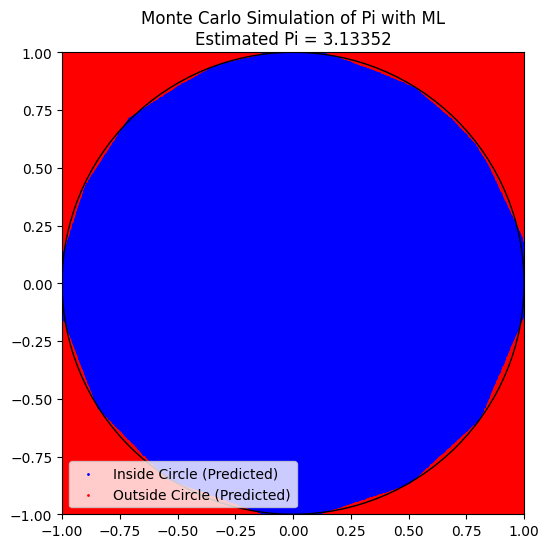

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n_points):
    x_points = np.random.uniform(-1, 1, n_points)
    y_points = np.random.uniform(-1, 1, n_points)
    distances = x_points**2 + y_points**2
    labels = (distances <= 1).astype(int)
    return np.stack((x_points, y_points), axis=1), labels

n_train = 100000
X_train, y_train = generate_data(n_train)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

n_test = 1000000
X_test, _ = generate_data(n_test)
predictions = model.predict(X_test)
inside_circle_predictions = np.sum(predictions >= 0.5)
pi_estimate = 4 * inside_circle_predictions / n_test

print(f"Estimated value of Pi using ML: {pi_estimate}")

plt.figure(figsize=(6,6))
inside = X_test[predictions.flatten() >= 0.5]
outside = X_test[predictions.flatten() < 0.5]
plt.scatter(inside[:, 0], inside[:, 1], color='blue', s=1, label='Inside Circle (Predicted)')
plt.scatter(outside[:, 0], outside[:, 1], color='red', s=1, label='Outside Circle (Predicted)')
circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_artist(circle)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"Monte Carlo Simulation of Pi with ML\nEstimated Pi = {pi_estimate}")
plt.legend()
plt.show()
